In [52]:
import numpy as np   #IMPORTING ALL THE IMPORTANT LIBRARIES
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

/kaggle/input/admission-predict/Admission_Predict.csv


2025-04-25 06:16:23.080587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745561783.394210      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745561783.479074      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **NOW WE ARE READING THE DATA** 

In [27]:
admin=pd.read_csv("/kaggle/input/admission-predict/Admission_Predict.csv")

# **FIRST WE WILL CHECK THE DATA AND ANALYSE ABOUT THE PROBLEM WHICH TYPE OF PROBLEM IT IS WHAT IS THE TARGET OR WHAT WE WANT TO PREDICT**

In [28]:
admin.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# **NOW WE ARE PERFORMING EDA (EXPLORATARY DATA ANALYSIS TO GET SOME DETAILS AND INSIGHTS ABOUT THE DATA)**

In [29]:
admin.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [30]:
admin.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [31]:
admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [34]:
admin.drop(columns=['Serial No.'],inplace=True)

In [35]:
admin.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
X = admin.iloc[:,0:-1]     #SEPERATING THE DATA FROM THE PREDICTION COLUMN
y = admin.iloc[:,-1]     

In [41]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [42]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1) #TRAIN TEST SPLIT GIVING 20 PERCENT OF THE DATA FOR TESTING AND 8 PERCENT FOR TRAINING

In [46]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [47]:
y_train

93     0.44
23     0.95
299    0.71
13     0.62
90     0.64
       ... 
255    0.79
72     0.93
396    0.84
235    0.88
37     0.58
Name: Chance of Admit , Length: 320, dtype: float64

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

# **SO WE PERFORMED CERTAIN EDA STEPS TO GET SOME INFORMATION ABOUT AS RESULT IN THIS DATA -**
**THERE ARE NO NULL VALUES IN THE DATA ALL**
**THERE IS NO USELESS COLUMNS EXCEPT SERIAL NUMBER WHICH WE DROPPED**
**WE APPLIED MIN MAX SCALER TO NORMALIZE THE DATA IN THE RANGE (0 TO 1)**

In [55]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-25 06:17:14.773135: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# **NOW WE ARE CREATING A SIMPLE SEQUANTIAL NEURAL NETWORK STRUCTURE FOR THE DATA** 

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

# **THESE ARE ALL OUR TRAINABLE PARAMETERS** 

In [57]:
model.compile(loss='mean_squared_error',optimizer='Adam')

# **TRAINING THE MODEL TILL 100 EPOCHS** 

In [58]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.9476 - val_loss: 0.9395
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8771 - val_loss: 0.8282
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7519 - val_loss: 0.7172
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6256 - val_loss: 0.6098
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5459 - val_loss: 0.5060
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4293 - val_loss: 0.4084
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3554 - val_loss: 0.3154
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2559 - val_loss: 0.2193
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1750 - val_loss: 0.1341
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1098 - val_loss: 0.0814
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0616 - val_loss: 0.0579
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - val_loss: 0.0511


In [59]:
y_pred = model.predict(X_test_scaled)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [60]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7732334968625131

# **PLOTTING THE GRAPH FOR CHECKING THE RELATION OF LSS AND VAL LOSS HOW ITS PERFORMING CHECKING FOR OVERFITTING**

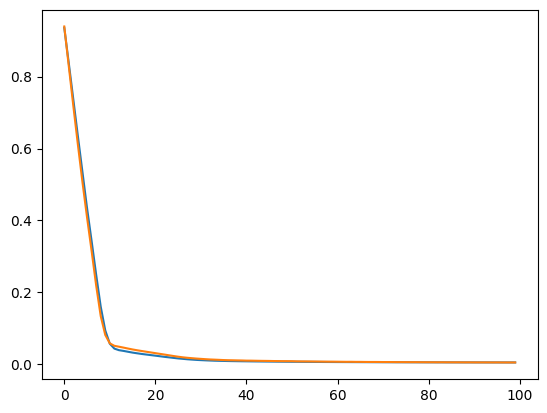

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Training vs Validation Loss Curve

# The plot above shows how the **training loss** (`loss`) and **validation loss** (`val_loss`) decrease over the epochs.

- Initially, both losses are high but **rapidly drop** within the first 10–15 epochs, indicating that the model is learning quickly.
- After that, the curves become flat and stable, meaning the model has **converged** and no longer improves significantly.
- The training and validation loss curves are very close to each other, which indicates:
  - No overfitting
  - Good generalization on unseen data

This is a healthy sign of model training, suggesting that the model was able to **learn efficiently** and is not memorizing the training data.


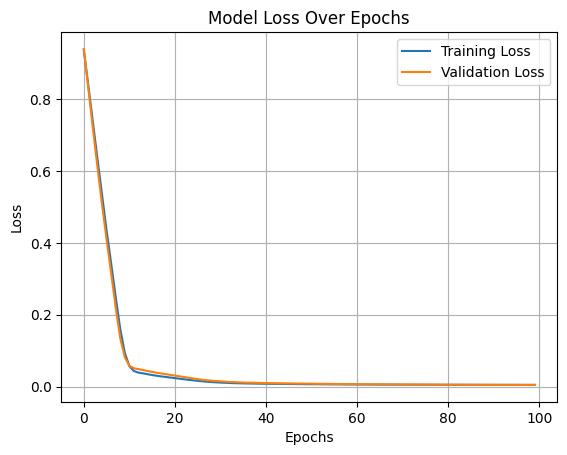

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()